# Cleaning and EDA Project
    
The purpose of this project is to show Data Science competency and literacy. This will be done by referencing computer code written in another language such as R and translated into Python.
    
 #### The Project
 1. Load and clean the data. Ensure each column has the appropriate data type.
 2. Conduct exploritory analysis to visualize and make comparisons across neighborhoods.
 3. Summarize findings.

### 1. Load and Clean...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('rollingsales_brooklyn.xls', sheet_name='Brooklyn',header=4)

df.sample(5, random_state=815)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
22450,3,WILLIAMSBURG-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,2332,1426,,R4,22 NORTH 6TH STREET,27G,...,1,0,1,0,0,2007,2,R4,768778,2012-09-21
1801,3,BEDFORD STUYVESANT,03 THREE FAMILY HOMES,1,1610,32,,C0,936A LAFAYETTE AVE,,...,3,0,3,1700,2924,1899,1,C0,510000,2013-01-10
8676,3,CROWN HEIGHTS,02 TWO FAMILY HOMES,1,1278,36,,S2,310 KINGSTON AVENUE,,...,2,1,3,2275,3420,1900,1,S2,540000,2012-09-06
20104,3,SHEEPSHEAD BAY,01 ONE FAMILY HOMES,1,7357,26,,A5,4236 BEDFORD AVENUE,,...,1,0,1,1344,1540,1935,1,A5,0,2012-11-21
21249,3,SUNSET PARK,09 COOPS - WALKUP APARTMENTS,2,918,36,,C6,"4002 7TH AVENUE, 34",,...,0,0,0,0,0,1925,2,C6,153000,2013-02-04


In [2]:
# adjust col view
pd.set_option('display.max_columns', 1000)
# check the type of each column
df.sample(5, random_state=815)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
22450,3,WILLIAMSBURG-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,2332,1426,,R4,22 NORTH 6TH STREET,27G,11249,1,0,1,0,0,2007,2,R4,768778,2012-09-21
1801,3,BEDFORD STUYVESANT,03 THREE FAMILY HOMES,1,1610,32,,C0,936A LAFAYETTE AVE,,11221,3,0,3,1700,2924,1899,1,C0,510000,2013-01-10
8676,3,CROWN HEIGHTS,02 TWO FAMILY HOMES,1,1278,36,,S2,310 KINGSTON AVENUE,,11213,2,1,3,2275,3420,1900,1,S2,540000,2012-09-06
20104,3,SHEEPSHEAD BAY,01 ONE FAMILY HOMES,1,7357,26,,A5,4236 BEDFORD AVENUE,,11229,1,0,1,1344,1540,1935,1,A5,0,2012-11-21
21249,3,SUNSET PARK,09 COOPS - WALKUP APARTMENTS,2,918,36,,C6,"4002 7TH AVENUE, 34",,11232,0,0,0,0,0,1925,2,C6,153000,2013-02-04


In [3]:
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART\nMENT\nNUMBER                       object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE\nPRICE                                int64
SALE DATE           

In [4]:
# workflow...

# update column names
col_dict = {
    'APART\nMENT\nNUMBER':'APARTMENT NUMBER',
    'SALE\nPRICE':'SALE PRICE'
           }
df.rename(columns=col_dict, inplace=True)

# remove all non integer characters from values and convert to int
# 'RESIDENTIAL UNITS' to int, strip comma
# 'TOTAL UNITS' to int, strip comma# 'TOTAL UNITS' to int, strip comma
# 'LAND SQUARE FEET' to int, strip comma
# 'GROSS SQUARE FEET' to int, strip comma
# 'SALE PRICE' fix column name, strip '$' and comma
df[['RESIDENTIAL UNITS','TOTAL UNITS','LAND SQUARE FEET',
    'GROSS SQUARE FEET','SALE PRICE']] = df[['RESIDENTIAL UNITS','TOTAL UNITS','LAND SQUARE FEET',
                                'GROSS SQUARE FEET', 'SALE PRICE']].replace({',':'', '\$':''}, regex=True)

df[['RESIDENTIAL UNITS','TOTAL UNITS','LAND SQUARE FEET',
    'GROSS SQUARE FEET','SALE PRICE']] = df[['RESIDENTIAL UNITS','TOTAL UNITS','LAND SQUARE FEET',
                                'GROSS SQUARE FEET', 'SALE PRICE']].astype(int)
# change Sale Date values to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%m/%d/%y')

# change column names to lower
col_names = { col: col.lower() for col in df.columns}
df.rename(columns=col_names,inplace=True)

df.sample(5, random_state=815)

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
22450,3,WILLIAMSBURG-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,2332,1426,,R4,22 NORTH 6TH STREET,27G,11249,1,0,1,0,0,2007,2,R4,768778,2012-09-21
1801,3,BEDFORD STUYVESANT,03 THREE FAMILY HOMES,1,1610,32,,C0,936A LAFAYETTE AVE,,11221,3,0,3,1700,2924,1899,1,C0,510000,2013-01-10
8676,3,CROWN HEIGHTS,02 TWO FAMILY HOMES,1,1278,36,,S2,310 KINGSTON AVENUE,,11213,2,1,3,2275,3420,1900,1,S2,540000,2012-09-06
20104,3,SHEEPSHEAD BAY,01 ONE FAMILY HOMES,1,7357,26,,A5,4236 BEDFORD AVENUE,,11229,1,0,1,1344,1540,1935,1,A5,0,2012-11-21
21249,3,SUNSET PARK,09 COOPS - WALKUP APARTMENTS,2,918,36,,C6,"4002 7TH AVENUE, 34",,11232,0,0,0,0,0,1925,2,C6,153000,2013-02-04


### 2. Exploratory Data Analysis

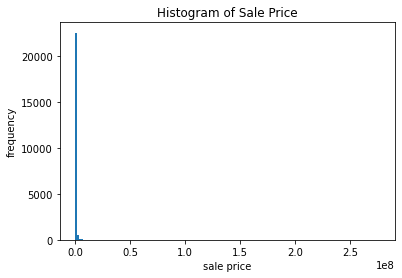

In [5]:
# set 'bin' equal to something.
# a quick search on the internet says... to take the ceiling of the square root of the length of our data set...

my_bin = round((df.shape[0])**0.5)

plt.hist(df['sale price'], bins=my_bin)
plt.title('Histogram of Sale Price')
plt.xlabel('sale price')
plt.ylabel('frequency')
plt.show()

A view of the histogram isn't entierly helpful. We see 'sale price' has a relatively logonormal distribution. We look at boxplots instead.

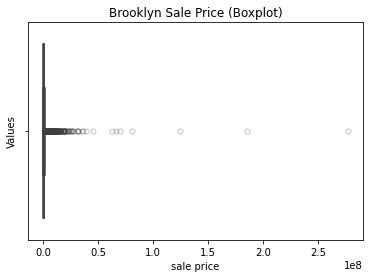

In [6]:
sns.boxplot(x=df['sale price'],flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3})
plt.title('Brooklyn Sale Price (Boxplot)')
plt.ylabel('Values')
plt.show()

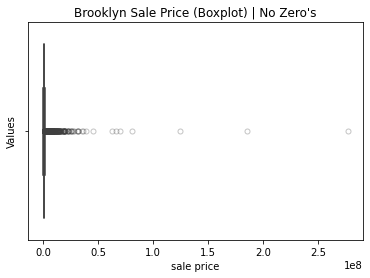

In [7]:
sns.boxplot(x=df['sale price'][df['sale price'] > 0], flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3})
plt.title('Brooklyn Sale Price (Boxplot) | No Zero\'s')
plt.ylabel('Values')
plt.show()

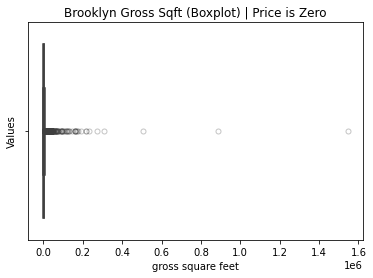

In [8]:
sns.boxplot(x=df['gross square feet'][df['sale price']==0],flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3})
plt.title('Brooklyn Gross Sqft (Boxplot) | Price is Zero')
plt.ylabel('Values')
plt.show()

The sale price for the Brooklyn dataset is right skewed. When we look at the values of the 'sale price' without zeros, the data set is still right skewed. Additionally, while we look at the 'gross square feet' for the dataset where the 'sale price' is zero, we see the boxplot is also right skewed. The distribution of each plot hints lognormal... still.

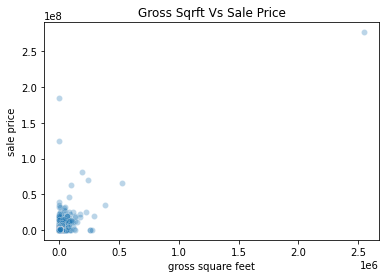

In [9]:
# we want to keep the actual sales
sold = df[df['sale price'] != 0]

# lets take a look of the 'sale price' vs 'gross sqft'
sns.scatterplot(data=sold, x='gross square feet', y='sale price', alpha=0.3)
plt.title('gross sqrft vs sale price'.title())
plt.show()

The R code referenced for this project produced 6,097 "-inf" after using the log function on the Brooklyn 'gross square feet' column. This means that R did not graph the 6,097 zeros. We will make a copy of the data we are looking at, add the log of 'gross square feet' and 'sale price', show the total number of 0's is equal to 6,097, and plot a side by side graph with "-inf" as 0 and without zeros.

### Caution:
We hit a bit of a speed bump when we started the second part of the project. We discovered we we’re missing 5 rows of data. This happened because we <b>dropped</b> all values equal to zero in the ‘gross square feet’ column. Even though the values are zero they still sold. Perhaps the ‘gross square feet’ wasn’t recorded, the way we would verify this is by contacting the creator of the file and ask.

<b>The problem:</b>
sold_copy = sold_copy[ sold_copy['gross square feet log'] <b>!=</b> 0.0 ]

<b>Was changed to:</b>
sold_copy = sold_copy[ sold_copy['gross square feet log'] <b>>=</b> 0.0 ]

The number of zeros that can't be graphed after converting with log:  6097


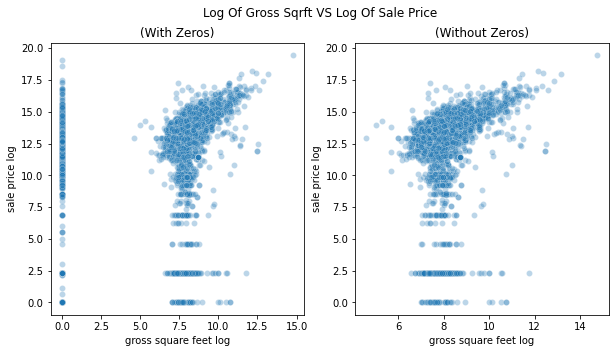

In [10]:
# make a copy of the "sold" dataframe
sold_copy = sold.copy()

sold_copy['gross square feet log'] = np.log(sold_copy['gross square feet'].astype('float'), where=sold_copy['gross square feet'].astype('float')>0.0)
sold_copy['sale price log'] = np.log(sold['sale price'].astype('float'))

# show that there are 6097
print('The number of zeros that can\'t be graphed after converting with log: ', sum(sold_copy['gross square feet log']==0))


# plot the side by side graph
fig, axs = plt.subplots(1,2, figsize=(10, 5))

fig.suptitle('log of gross sqrft'.title()+' VS '+'log of sale price'.title())

sns.scatterplot(data=sold_copy, x='gross square feet log', y='sale price log', alpha=0.3, ax=axs[0])
axs[0].set_title('(with zeros)'.title())

sold_copy = sold_copy[ sold_copy['gross square feet log'] >= 0.0 ]

sns.scatterplot(data=sold_copy[sold_copy['gross square feet log']!=0.0], x='gross square feet log', y='sale price log', alpha=0.3, ax=axs[1])
axs[1].set_title('(without zeros)'.title())

plt.show()

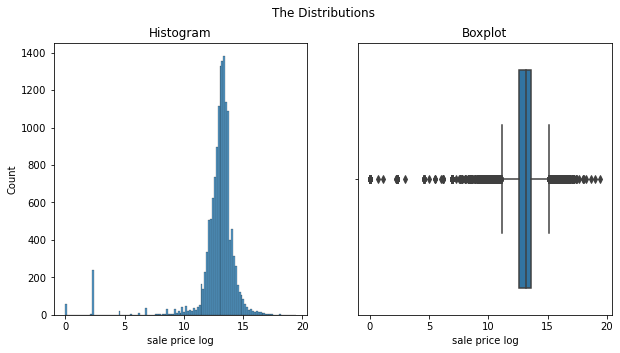

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))

fig.suptitle('the distributions'.title())

sns.histplot(data=sold_copy['sale price log'], bins=round((sold_copy.shape[0])**0.5), ax=axs[0])
axs[0].set_title('histogram'.title())

sns.boxplot(x=sold_copy['sale price log'], ax=axs[1])
axs[1].set_title('boxplot'.title())

plt.show()

In [12]:
sold_copy['building class category'].value_counts()

02  TWO FAMILY HOMES                            3503
10  COOPS - ELEVATOR APARTMENTS                 1920
01  ONE FAMILY HOMES                            1859
13  CONDOS - ELEVATOR APARTMENTS                1711
03  THREE FAMILY HOMES                          1253
07  RENTALS - WALKUP APARTMENTS                 1015
09  COOPS - WALKUP APARTMENTS                    601
15  CONDOS - 2-10 UNIT RESIDENTIAL               545
12  CONDOS - WALKUP APARTMENTS                   400
04  TAX CLASS 1 CONDOS                           293
14  RENTALS - 4-10 UNIT                          216
05  TAX CLASS 1 VACANT LAND                      191
22  STORE BUILDINGS                              182
29  COMMERCIAL GARAGES                           144
30  WAREHOUSES                                   100
17  CONDOPS                                       89
31  COMMERCIAL VACANT LAND                        80
21  OFFICE BUILDINGS                              79
27  FACTORIES                                 

In [13]:
# for now, let's look at 1-, 2-, and 3-family homes
sold_fam_homes = sold_copy[sold_copy['building class category'].str.contains('FAMILY')]
sold_fam_homes['building class category'].value_counts()

02  TWO FAMILY HOMES                            3503
01  ONE FAMILY HOMES                            1859
03  THREE FAMILY HOMES                          1253
Name: building class category, dtype: int64

In [14]:
sold_fam_homes[ sold_fam_homes['sale price'] < 100000 ]

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,gross square feet log,sale price log
84,3,BATH BEACH,02 TWO FAMILY HOMES,1,6394,36,,B1,8691 15TH AVENUE,,11228,2,0,2,2344,3240,1940,1,B1,97500,2012-11-20,8.083329,11.487608
101,3,BATH BEACH,02 TWO FAMILY HOMES,1,6413,65,,B3,140 BAY 29TH STREET,,11214,2,0,2,2900,2000,1925,1,B3,10,2013-02-28,7.600902,2.302585
116,3,BATH BEACH,02 TWO FAMILY HOMES,1,6433,11,,B3,1701 CROPSEY AVENUE,,11214,2,0,2,1906,2490,1920,1,B3,10,2012-11-13,7.820038,2.302585
372,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5967,3,,A1,7821 COLONIAL ROAD,,11209,1,0,1,3000,2288,1925,1,A1,10,2013-05-14,7.735433,2.302585
438,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6053,39,,A5,38 GATLING PLACE,,11209,1,0,1,1401,1010,1925,1,A5,10,2013-04-05,6.917706,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21768,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2739,3,,B9,386 MANHATTAN AVENUE,,11211,2,0,2,1250,1440,1901,1,B9,75432,2012-08-14,7.272398,11.230987
21784,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,2767,14,,B9,16 DEVOE STREET,,11211,2,0,2,1962,2740,1899,1,B9,10,2013-01-11,7.915713,2.302585
22759,3,WILLIAMSBURG-SOUTH,01 ONE FAMILY HOMES,1,2395,128,,S1,245 SOUTH 1ST STREET,,11211,1,1,2,1283,2300,1910,1,S1,44000,2013-01-09,7.740664,10.691945
23097,3,WINDSOR TERRACE,02 TWO FAMILY HOMES,1,877,12,,B9,508 17TH STREET,,11215,2,0,2,2003,2080,1910,1,B9,1,2013-03-27,7.640123,0.000000


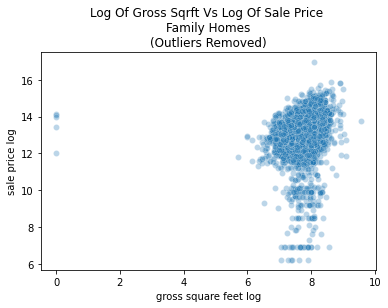

In [15]:
# remove outliers via graphically, 'sale price log' greater than 5...
homes = sold_fam_homes[ sold_fam_homes['sale price log'] > 5 ]

sns.scatterplot(data=homes, x='gross square feet log', y='sale price log', alpha=0.3)
plt.title('log of gross sqrft vs log of sale price \nfamily homes\n(outliers removed)'.title())
plt.show()

### Note on the Graph above
In order to produce a graph similar to the reference code we would have needed to remove the all 'gross square feet log' equal to zero. However, to produce the same output Ben created we would need to keep these values. Later we find that he removes them in the next project.

In [16]:
homes.to_csv('Noe\'s BRKLYN OP.csv')

### Summary
   We found several empty values throughout the dataset in various columns. We were able to ignore these briefly by looking exclusively at 1-, 2-, and 3-family homes. The "gross square feet" and "sale price" was converted into its log form where we were able to visually see a tighter cluster of the data. The "sale price" ranges from 22,026.47 to 485,165,195.40 and "gross square feet" from 1,096.63 to 59,874.14. We will later run this thorugh our machine learning algarithm to make predictions on various price by square feet conditions.